# Optimize Portfolio Based on Forecast

In this context, portfolio optimization involves adjusting the allocation of assets in a sample investment portfolio to achieve the best possible balance between returns and risk, based on forecasted prices for different assets. Here's a breakdown of the key steps and concepts involved in this process:

The main goal here is to maximize the portfolio's returns while minimizing its risk. By forecasting the performance of each asset, you can make more informed decisions on how to allocate your investments.

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname('../'), 'src'))

from portfolio_optimization import PortfolioOptimization

optimizer = PortfolioOptimization()

In [2]:
# import pandas as pd

# data = pd.read_csv("../data/processed/forecast_combined.csv")
# print(data.columns)


In [3]:
# Load data
forecast_data=optimizer.load_asset_data("../data/processed/forecast_combined.csv")

In [4]:
forecast_data.head()

,TSLA,BND,SPY
Date,,,
2024-10-31,178.535295,69.996396,376.146826
2024-11-01,177.300575,69.957360,374.549608
2024-11-02,178.864823,69.982981,374.741260
2024-11-03,177.095152,70.011681,374.081341
2024-11-04,178.938422,70.024876,373.421528


Calculate the log returns of each asset in the portfolio. Log returns are a way to measure the rate of return on an investment and are often preferred over simple returns for statistical analysis because they are time-additive.

In [5]:
optimizer.calculate_log_returns(forecast_data)

,TSLA,BND,SPY
Date,,,
2024-10-31,NaN,NaN,NaN
2024-11-01,-6.939855e-03,-0.000558,-4.255303e-03
2024-11-02,8.783883e-03,0.000366,5.115563e-04
2024-11-03,-9.943168e-03,0.000410,-1.762551e-03
2024-11-04,1.035456e-02,0.000188,-1.765381e-03
...,...,...,...
2025-10-26,8.861404e-07,0.000000,-1.464957e-08
2025-10-27,-8.595396e-07,0.000000,-1.523172e-08
2025-10-28,7.753889e-07,0.000000,-8.107956e-09


Calculates the variance of the log returns for each asset in the portfolio. Variance is a statistical measure of the dispersion of returns, and in finance, it helps quantify the risk associated with an asset.

In [7]:
variance=optimizer.calculate_variance(forecast_data)
variance

TSLA    0.030036
BND     0.000012
SPY     0.027342
dtype: float64

#### Implications

The variance values displayed for each asset (TSLA, BND, and SPY) indicate how much each asset's returns deviate from their average returns. In a portfolio context, variance is a measure of risk or volatility for each asset. Higher variance suggests greater risk, as the asset's returns are more spread out from the average, while lower variance suggests more stability in returns.

As a growth stock, Tesla is prone to large price swings, which indicates higher potential returns but also higher risk.

The very low variance for this bond ETF suggests that it is quite stable with little deviation in returns.

The variance for the S&P 500 ETF is lower than TSLA but higher than BND, showing that it has moderate risk.

#### Volatality

Calculates the annualized volatility of each asset, which represents the standard deviation of returns over a year. Volatility is a common measure of the risk of an asset, and annualizing it allows for comparisons across different assets and time periods.

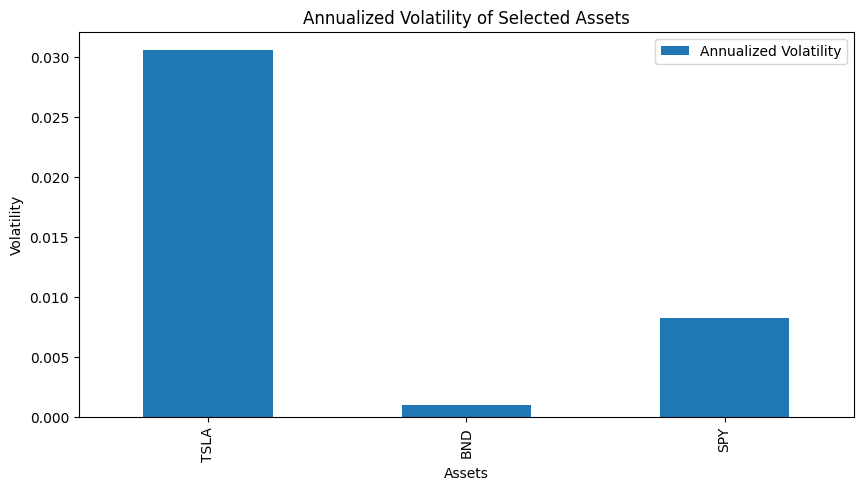

TSLA    2.751183
BND     0.055810
SPY     2.624896
dtype: float64

In [8]:
optimizer.calculate_volatility(forecast_data, variance)


The bar chart shows the annualized volatility of each asset (TSLA, BND, and SPY) in the portfolio, representing the degree of risk associated with each one. Volatility, which is the square root of variance, measures how much the asset’s returns fluctuate around the average return.

Tesla has a significantly higher annualized volatility compared to the other assets, meaning it experiences large fluctuations in price. This high volatility implies greater potential for high returns but also substantial risk.

BND’s low volatility indicates that its returns are relatively consistent and less affected by market swings. Bonds are typically considered "safe-haven" assets that provide steady returns with lower risk, which helps reduce the overall portfolio risk.

SPY provides a balance between growth potential and stability, making it a solid choice for reducing portfolio risk while still capturing broad market returns.

### Covariance

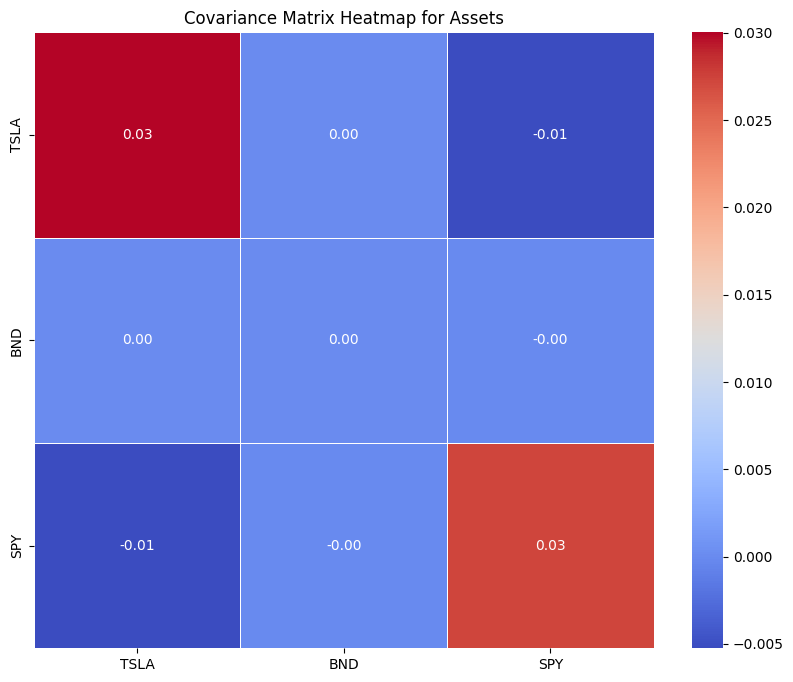

In [10]:
covariance_matrix=optimizer.compute_covariance_matrix(forecast_data)

### Correlation

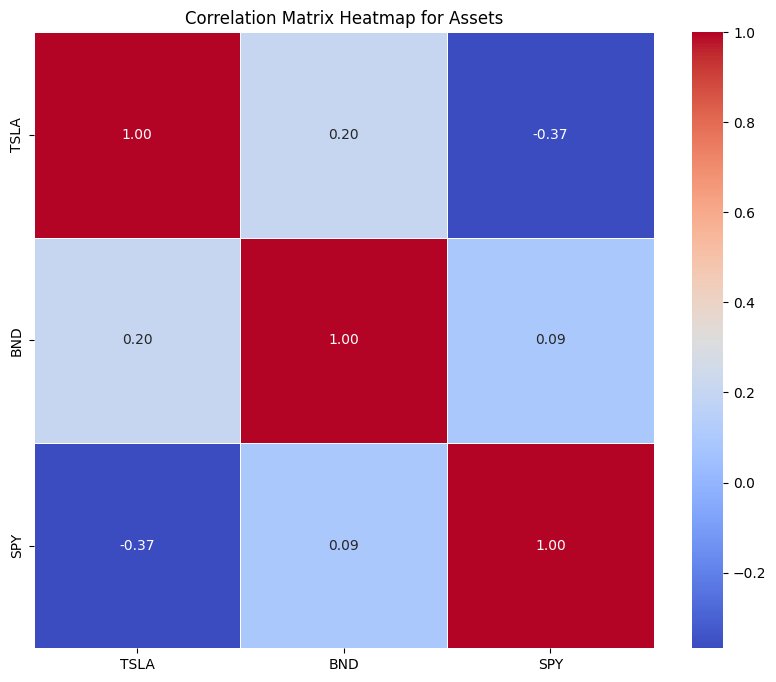

In [11]:
correlation_matrix=optimizer.compute_correlation_matrix(forecast_data)

### Building an optimal risky portfolio

#### Annual Expected Return

In [12]:
avg_annual_return, annual_std_dev = optimizer.calculate_annualized_returns(forecast_data)

/home/seyfe/Desktop/KAIM/Time_Series_Portfolio_Optimization/notebooks/../src/portfolio_optimization.py:59: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  avg_annual_return = asset_data.resample('Y').last().pct_change().mean()


#### Efficient Frontier

Efficient frontier is a graph with `returns` on the Y-axis and `volatility` on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns. Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

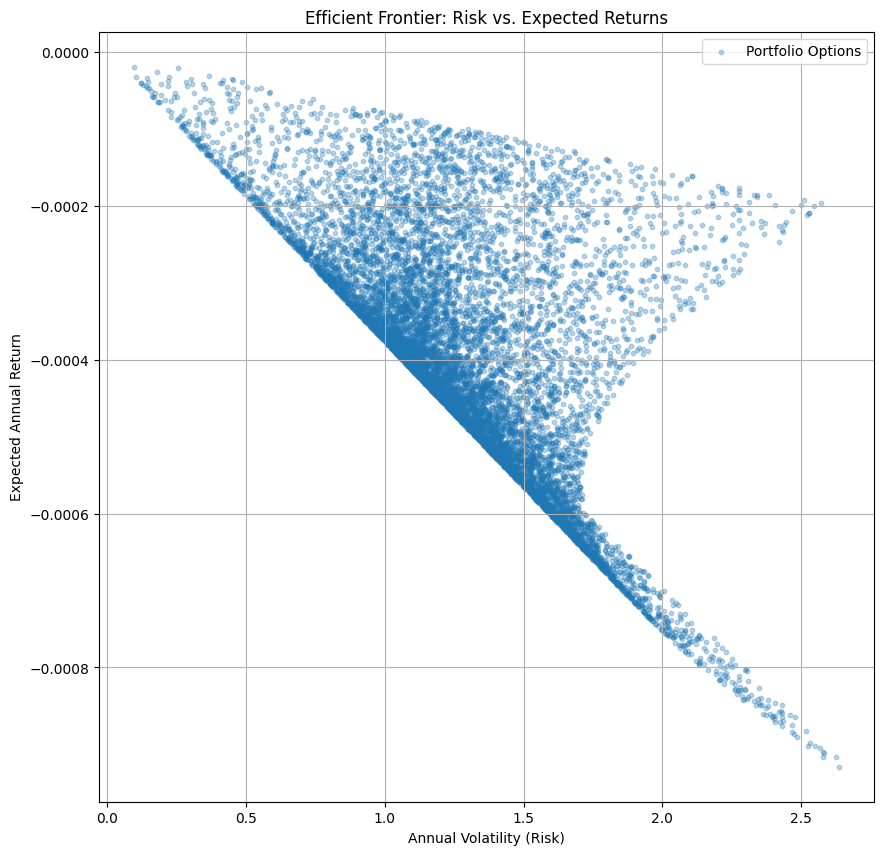

In [13]:
efficient_frontier=optimizer.plot_efficient_frontier(forecast_data, covariance_matrix, avg_annual_return, annual_std_dev)

This **Efficient Frontier** plot shows a `negative` risk-return relationship for the portfolios, with higher risk (volatility) leading to lower or negative returns. It suggests the selected assets may not provide efficient returns for the risk taken, highlighting potential for optimization or reconsidering asset choices.

### Minimum Volatility Portfolio

A minimum volatility portfolio is a portfolio constructed to minimize risk (volatility) while achieving a certain level of return. It is a specific point on the efficient frontier, representing the portfolio with the lowest possible volatility for a given level of expected return.

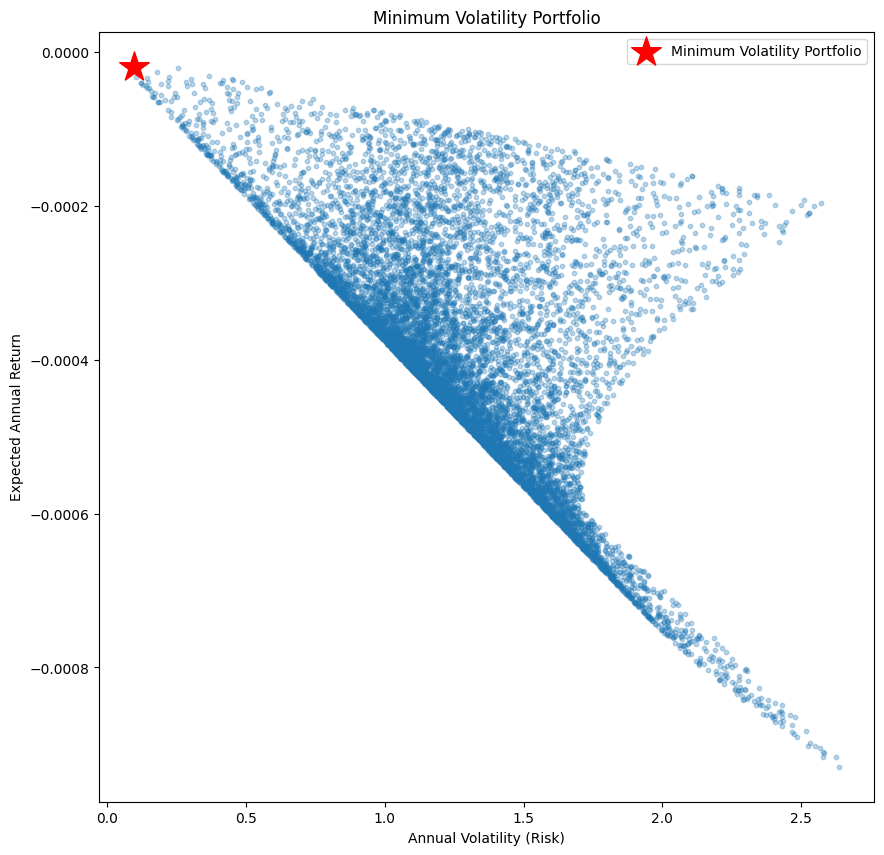

In [14]:
min_vol_portfolio=optimizer.identify_min_volatility_portfolio(efficient_frontier)


In [15]:
min_vol_portfolio

Return        -0.000019
Volatility     0.097601
TSLA Weight    0.012324
BND Weight     0.955541
SPY Weight     0.032134
Name: 3596, dtype: float64

This portfolio is optimized to minimize risk (volatility) but sacrifices return, even resulting in a slightly negative expected return. Most of the weight is in BND (bonds), which are generally lower-risk but offer lower returns. This is suitable for extremely risk-averse investors willing to accept very low or negative returns to minimize exposure to volatility.

### Optimal Portfolio

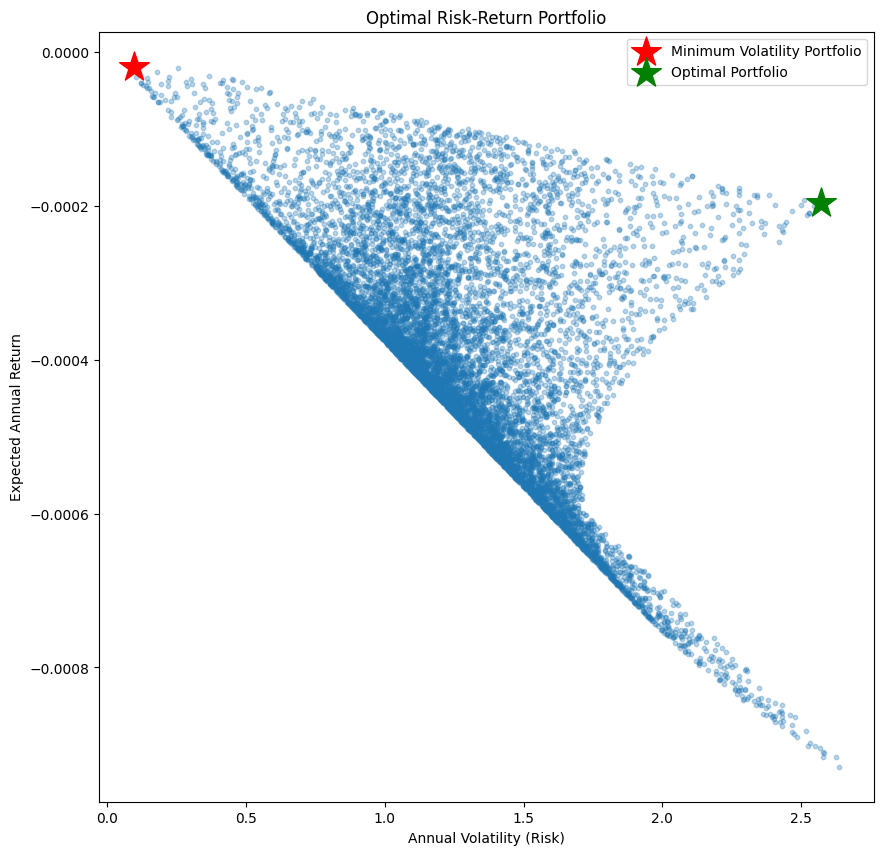

In [16]:
optimal_portfolio=optimizer.identify_optimal_risky_portfolio(efficient_frontier,min_vol_portfolio)

In [17]:
optimal_portfolio

Return        -0.000196
Volatility     2.570345
TSLA Weight    0.000426
BND Weight     0.016331
SPY Weight     0.983244
Name: 3417, dtype: float64

This portfolio is termed "optimal" based on a different objective, likely maximizing return given the portfolio's composition. However, it still shows a negative expected return with very high volatility, which suggests this set of assets struggles to achieve a favorable risk-return balance. SPY (S&P 500 index) dominates, indicating a high equity exposure, which increases volatility. This portfolio may appeal to those who prioritize market exposure and potential growth, despite the expected negative return.